In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
cred = pd.read_csv('Credit.csv')

In [5]:
cred = cred.drop(columns='Unnamed: 0')

In [6]:
cred

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [8]:
cred.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [9]:
##No missing values

In [10]:
cred.isna().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [11]:
#No NaN values

In [12]:
cred.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [14]:
cred.dtypes[cred.dtypes==object]

Gender       object
Student      object
Married      object
Ethnicity    object
dtype: object

In [15]:
#For the above 4, we will convert them to numeric

In [16]:
cred = pd.get_dummies(cred,columns=['Gender','Student','Married','Ethnicity'],drop_first=True)

In [17]:
cred

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,0,0,1,0,1
396,13.364,3838,296,5,65,17,480,0,0,0,0,0
397,57.872,4171,321,5,67,12,138,1,0,1,0,1
398,37.728,2525,192,1,44,13,0,0,0,1,0,1


In [19]:
cred.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,0,0,1,0,1


In [ ]:
#Here Rating(Credit Score) is the dependant variable and it 
#depends on independant variables such as Income, Education, Balance, No. of cards, Credit Limit,
#Gender and other variables

In [21]:
cred.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,0,0,1,0,1


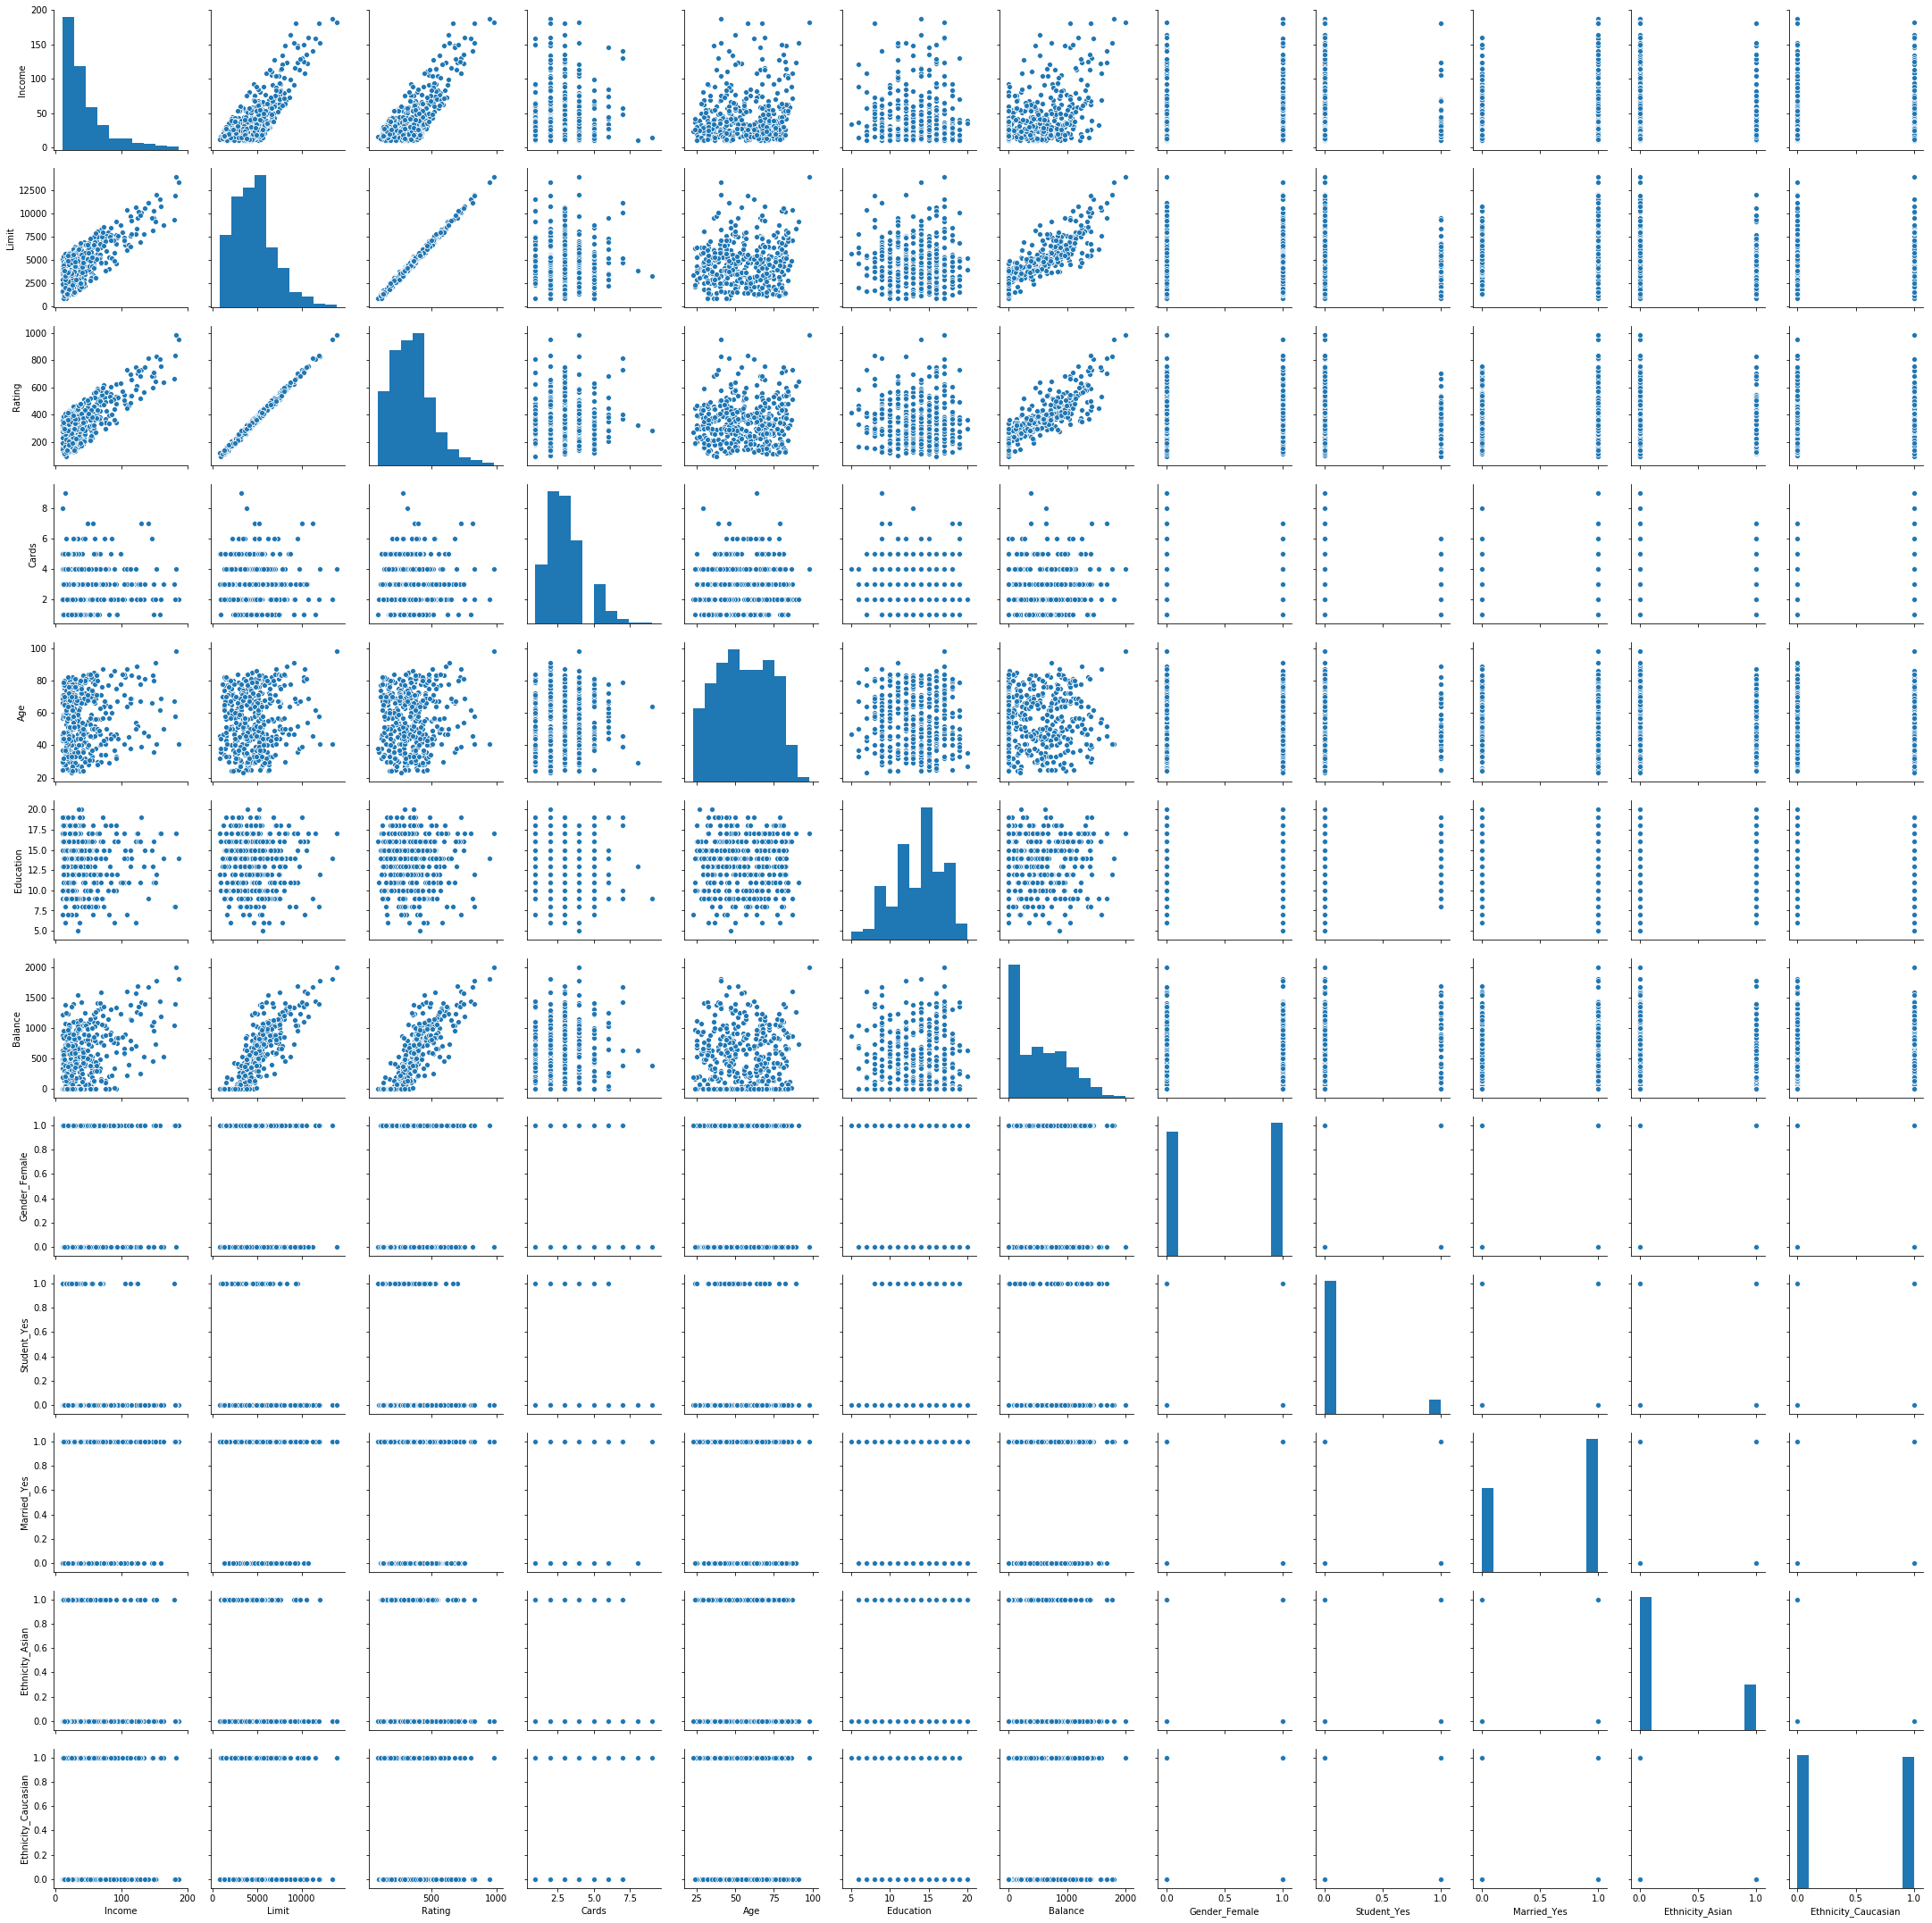

In [23]:
sns.pairplot(cred)

In [ ]:
##There are many inferences from the pairplot: Some are:
#We can see high correlation between limit and rating
#Balance scattered with Income, Limit and Rating, does not specifically define a relationship, but
#at the same time the randomness is less
#Age scattered with Income, Limit and Rating is highly scattered, which shows that People of all ages
#are using Credit cards irrespective of Income, Limit and Rating(they continue to use credit cards)
#Rating Vs Balance shows that people with higher balance get higher ratings, but again, this is not
#true in all cases, so that's why we have to build a prediction model

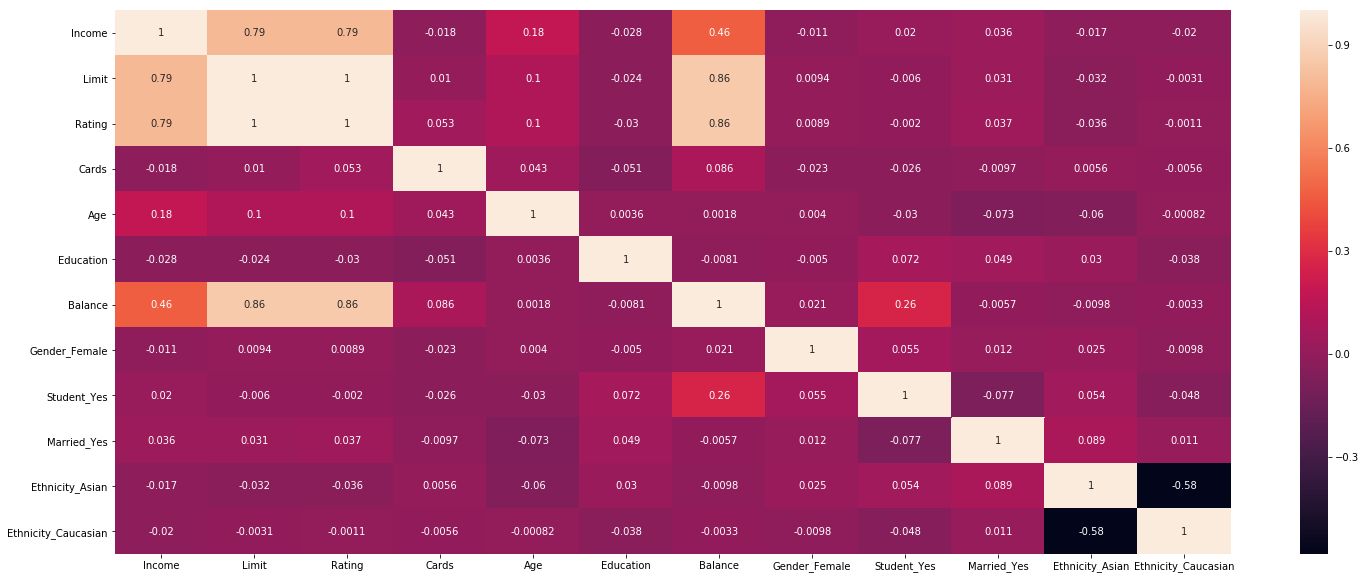

In [25]:
plt.figure(figsize=(25,10))
sns.heatmap(cred.corr(),annot=True)

In [26]:
##Limit and rating have a correlation of 1, which means only one of them is needed for further
#processing. Since Rating will be the Target, we can still use Limit
#limit (and Rating) are highly correlated with Income and Balance, which means that either Limit
#or Balance could be sufficient for building a better model, as independantvariables 
#which are highly correlated, with each other, then only one of them must be used.

In [31]:
y = cred['Rating']
x = cred.drop(columns='Rating')

In [32]:
X = sm.add_constant(x)

In [44]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)

In [45]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(280, 12)
(120, 12)
(280,)
(120,)


In [48]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

model1 = sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     8399.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:04:28   Log-Likelihood:                -1488.4
No. Observations:                 400   AIC:                             3001.
Df Residuals:                     388   BIC:                             3049.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0084      4.136      7.739      0.000      23.877      40.140
Income                  0.1239      0.047      2.644      0.009       0.032       0.216
Limit                   0.0632      0.001     44.309      0.000       0.060       0.066
Cards                   4.5967      0.391     11.756      0.000       3.828       5.365
Age                     0.0126      0.030      0.415      0.679      -0.047       0.072
Education              -0.2349      0.164     -1.434      0.152      -0.557       0.087
Balance                 0.0120      0.005      2.315      0.021       0.002       0.022
Gender_Female           0.2204      1.020      0.216      0.829      -1.785       2.225
Student_Yes            -2.0068      2.805     -0.715      0.475      -7.522       3.508
Married_Yes             2.3823      1.058      2.251      0.025       0.301       4.463
Ethnicity_Asian        -2.0062      1.449     -1.384      0.167      -4.856       0.843
Ethnicity_Caucasian    -0.3096      1.255     -0.247      0.805      -2.777       2.158
==============================================================================
Omnibus:                        6.295   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.637
Skew:                           0.226   Prob(JB):                       0.0597
Kurtosis:                       2.633   Cond. No.                     4.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
##In the case of full model, the Rsquare and the Rsquare Adjusted, have the same values, which means
#that there are no unncessary variables present in the model
#Seeing the Prob(F-statistic), we can notice that is is less than 0.05, which means we can proceed
#to check for the P values of the independant variables.
#The p values show that Income, Limit, Cards, Balance and Married are the most significant variables
#since their p values are lesser than 0.05

In [38]:
#We can try building another model after removing Limit, because Limit's correlation with the
#target variable is 1

In [40]:
X1 = X.drop(columns='Limit')

In [47]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X1,y,test_size=0.3,random_state=0)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(280, 11)
(120, 11)
(280,)
(120,)


In [49]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

model2 = sm.OLS(y,X1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1496.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          2.04e-303
Time:                        14:04:38   Log-Likelihood:                -1848.7
No. Observations:                 400   AIC:                             3719.
Df Residuals:                     389   BIC:                             3763.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 141.9322      8.135     17.446      0.000     125.937     157.927
Income                  2.0617      0.041     49.922      0.000       1.980       2.143
Cards                  -0.3829      0.921     -0.416      0.678      -2.193       1.427
Age                     0.1242      0.074      1.670      0.096      -0.022       0.270
Education               0.0800      0.402      0.199      0.843      -0.711       0.871
Balance                 0.2339      0.003     72.332      0.000       0.228       0.240
Gender_Female           2.9477      2.502      1.178      0.240      -1.972       7.868
Student_Yes           -97.9954      4.381    -22.369      0.000    -106.609     -89.382
Married_Yes             3.6834      2.601      1.416      0.158      -1.431       8.798
Ethnicity_Asian        -5.7228      3.557     -1.609      0.108     -12.716       1.271
Ethnicity_Caucasian    -2.5063      3.083     -0.813      0.417      -8.568       3.556
==============================================================================
Omnibus:                       53.160   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.842
Skew:                          -0.969   Prob(JB):                     4.14e-16
Kurtosis:                       3.706   Cond. No.                     4.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#Now,we see that the Rsquare and the Rsquare Adjusted are a bit different, which means that
#the true value is showcased by Rsquare adjusted, and these values changed after removing 'Limit'
#as the independant varible.
#The warning shows that multicollearity exists in our model, and to refine the model, multicollearity
#should be removed.

In [ ]:
#now, for both models above, let's build for the training set,and test it on train and test.

In [50]:
model3 = sm.OLS(y_train1,X_train1).fit() #For training model1(with 'Limit')
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6521.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          2.35e-318
Time:                        14:05:50   Log-Likelihood:                -1035.6
No. Observations:                 280   AIC:                             2095.
Df Residuals:                     268   BIC:                             2139.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  34.7361      4.848      7.165      0.000      25.191      44.281
Income                  0.1378      0.054      2.538      0.012       0.031       0.245
Limit                   0.0631      0.002     38.342      0.000       0.060       0.066
Cards                   4.6089      0.470      9.809      0.000       3.684       5.534
Age                     0.0128      0.036      0.356      0.722      -0.058       0.083
Education              -0.3470      0.194     -1.787      0.075      -0.729       0.035
Balance                 0.0113      0.006      1.901      0.058      -0.000       0.023
Gender_Female          -0.4555      1.202     -0.379      0.705      -2.822       1.911
Student_Yes            -3.0124      3.215     -0.937      0.350      -9.343       3.318
Married_Yes             2.3515      1.246      1.888      0.060      -0.101       4.804
Ethnicity_Asian        -2.3597      1.730     -1.364      0.174      -5.766       1.047
Ethnicity_Caucasian    -0.2497      1.440     -0.173      0.863      -3.086       2.586
==============================================================================
Omnibus:                        3.997   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.491
Skew:                           0.190   Prob(JB):                        0.175
Kurtosis:                       2.607   Cond. No.                     4.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
model4 = sm.OLS(y_train2,X_train2).fit() #For training model2(without 'Limit')
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1087.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          4.00e-211
Time:                        14:12:07   Log-Likelihood:                -1297.4
No. Observations:                 280   AIC:                             2617.
Df Residuals:                     269   BIC:                             2657.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 147.7470      9.784     15.101      0.000     128.484     167.010
Income                  2.0768      0.050     41.347      0.000       1.978       2.176
Cards                  -0.0499      1.154     -0.043      0.966      -2.321       2.221
Age                     0.1157      0.091      1.275      0.204      -0.063       0.294
Education              -0.3813      0.494     -0.772      0.441      -1.353       0.591
Balance                 0.2323      0.004     59.242      0.000       0.225       0.240
Gender_Female           1.8244      3.051      0.598      0.550      -4.183       7.832
Student_Yes           -95.6525      5.393    -17.737      0.000    -106.270     -85.035
Married_Yes             3.2946      3.166      1.041      0.299      -2.939       9.528
Ethnicity_Asian        -4.4457      4.396     -1.011      0.313     -13.100       4.209
Ethnicity_Caucasian    -1.2029      3.661     -0.329      0.743      -8.410       6.005
==============================================================================
Omnibus:                       40.056   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.761
Skew:                          -0.998   Prob(JB):                     3.49e-12
Kurtosis:                       3.732   Cond. No.                     4.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
ypred1 = model3.predict(X_test1)
np.sqrt(metrics.mean_squared_error(ypred1,y_test1))

10.633803903061583

In [56]:
ypred2 = model4.predict(X_test2)
np.sqrt(metrics.mean_squared_error(ypred2,y_test2))

24.160629490526894

In [57]:
##So,we see that RMSE for test data in the model without 'Limit' is higher, and the Rsquare is lower,
#as compared to the full model---so taking the full model is the best choice at the moment,
#until we can refine it more to remove multicollearity

In [118]:
##In this model, I have created separate models for train and test data, and calculated their
#Values, but this is not a real time example, as I have created a separate model for test as well.
##After this code, please see the next code, where I have created only one model, i.e. model4,
#and trained it on the train data, and used that model to calculated values for both test and train
#so that model is more efficient.
import statsmodels.api as sm
def fun1(df):
    y = df['Rating']
    x = df.drop(columns='Rating')
    X = sm.add_constant(x)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)
    model4 = sm.OLS(y_train1,X_train1).fit()
    ypredtrain = model4.predict(X_train1)
    rmse_train = np.sqrt(metrics.mean_squared_error(ypredtrain,y_train1))
    r2train = model4.rsquared
    r2_adjtrain = model4.rsquared_adj
    model5 = sm.OLS(y_test1,X_test1).fit()
    ypredtest = model5.predict(X_test1)
    rmse_test = np.sqrt(metrics.mean_squared_error(ypredtest,y_test1))
    r2test = model5.rsquared
    r2_adjtest = model5.rsquared_adj
    df2 = pd.DataFrame({"Train":[X_train1.shape,rmse_train,r2train,r2_adjtrain],"Test":[X_test1.shape,rmse_test,r2test,r2_adjtest]},index=['Dataset_Size','RMSE','Rsquared','RSquared-Adjusted'])
    return df2
fun1(cred)

,Train,Test
Dataset_Size,"(280, 12)","(120, 12)"
RMSE,9.7746,10.0695
Rsquared,0.996278,0.994843
RSquared-Adjusted,0.996125,0.994317


In [ ]:
##Above I have created a model for the test case and train case both,and tested the test on the
#test model itself.
##Below I will test the 'Test case' on the train model

In [119]:
#More Efficient Model- Created only Model4, using train, and tested it on test and train both.
##Only RSquare-Adjusted for test was calculated using a separate model5 for test.

import statsmodels.api as sm
def fun2(df):
    y = df['Rating']
    x = df.drop(columns='Rating')
    X = sm.add_constant(x)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)
    model4 = sm.OLS(y_train1,X_train1).fit()
    ypredtrain = model4.predict(X_train1)
    rmse_train = np.sqrt(metrics.mean_squared_error(ypredtrain,y_train1))
    r2train = model4.rsquared
    r2_adjtrain = model4.rsquared_adj
    ypredtest = model4.predict(X_test1) ##Changed this line as per above code--now testing
    rmse_test = np.sqrt(metrics.mean_squared_error(ypredtest,y_test1))
    r2test = metrics.r2_score(ypredtest,y_test1)
    model5 = sm.OLS(y_test1,X_test1).fit()
    r2_adjtest = model5.rsquared_adj
    df2 = pd.DataFrame({"Train":[X_train1.shape,rmse_train,r2train,r2_adjtrain],"Test":[X_test1.shape,rmse_test,r2test,r2_adjtest]},index=['Dataset_Size','RMSE','Rsquared','RSquared-Adjusted'])
    return df2
fun2(cred)

,Train,Test
Dataset_Size,"(280, 12)","(120, 12)"
RMSE,9.7746,10.6338
Rsquared,0.996278,0.994183
RSquared-Adjusted,0.996125,0.994317


In [122]:
#More Efficient Model- Here I have printed only the shape of the dataset, instead of the size.
#Printed size above to show the difference in size after doing VIF

import statsmodels.api as sm
def fun5(df):
    y = df['Rating']
    x = df.drop(columns='Rating')
    X = sm.add_constant(x)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)
    model4 = sm.OLS(y_train1,X_train1).fit()
    ypredtrain = model4.predict(X_train1)
    rmse_train = np.sqrt(metrics.mean_squared_error(ypredtrain,y_train1))
    r2train = model4.rsquared
    r2_adjtrain = model4.rsquared_adj
    ypredtest = model4.predict(X_test1) ##Changed this line as per above code--now testing
    rmse_test = np.sqrt(metrics.mean_squared_error(ypredtest,y_test1))
    r2test = metrics.r2_score(ypredtest,y_test1)
    model5 = sm.OLS(y_test1,X_test1).fit()
    r2_adjtest = model5.rsquared_adj
    df2 = pd.DataFrame({"Train":[X_train1.shape[0],rmse_train,r2train,r2_adjtrain],"Test":[X_test1.shape[0],rmse_test,r2test,r2_adjtest]},index=['Dataset_Size','RMSE','Rsquared','RSquared-Adjusted'])
    return df2
fun5(cred)

,Train,Test
Dataset_Size,280.000000,120.000000
RMSE,9.774601,10.633804
Rsquared,0.996278,0.994183
RSquared-Adjusted,0.996125,0.994317


In [97]:
##The above model is actually the correct way for training the train data and then testing it
#Rsquare Adjusted for the test has still be calculated from a model created for test, whereas all other
#metrics have been calculated using the training model itself

In [101]:
# removing collinear variables using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [102]:
train_out = calculate_vif(X)

Iteration no.
1
[66.45055655246159, 10.5651082907911, 41.99390473963836, 1.1140865535453697, 1.0627552813445258, 1.0154477934446495, 21.968988642936626, 1.0087211456720182, 2.751113043866044, 1.0329753734414462, 1.5501674814420587, 1.5299616323739382]
Max VIF is for variable no.:
0
Iteration no.
2
[19.935443706218678, 140.32670796332107, 5.129933100852491, 10.829652053545988, 14.668517348170438, 34.29717787449404, 2.072960832324196, 2.3977407123730603, 2.631466754429536, 1.983249494945822, 2.857107922156532]
Max VIF is for variable no.:
1
Iteration no.
3
[3.576022408406926, 5.122164960340759, 9.32678069003024, 10.85952083433017, 3.209948566170123, 2.029408812254883, 1.2335564543552942, 2.5932814195640574, 1.9664097583374704, 2.8001915834069857]
Max VIF is for variable no.:
3
Iteration no.
4
[3.571301405568643, 4.784332202875124, 6.799775239034521, 3.1936960515898103, 1.9942857586767953, 1.220742606978258, 2.4590413124835373, 1.8768065471164026, 2.6575601828518303]
Max VIF is for variab

In [103]:
## includes only the relevant features for creating refined model:
train_out.head()

,Income,Cards,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,2,333,0,0,1,0,1
1,106.025,3,903,1,1,1,1,0
2,104.593,4,580,0,0,0,1,0
3,148.924,3,964,1,0,0,1,0
4,55.882,2,331,0,0,1,0,1


In [105]:
#So, now we will create a model using train_out as our independant variables

In [120]:
import statsmodels.api as sm
def fun3(df):
    y = df['Rating']
    x = train_out
    X = sm.add_constant(x)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)
    model4 = sm.OLS(y_train1,X_train1).fit()
    ypredtrain = model4.predict(X_train1)
    rmse_train = np.sqrt(metrics.mean_squared_error(ypredtrain,y_train1))
    r2train = model4.rsquared
    r2_adjtrain = model4.rsquared_adj
    ypredtest = model4.predict(X_test1) ##Changed this line as per above code--now testing
    rmse_test = np.sqrt(metrics.mean_squared_error(ypredtest,y_test1))
    r2test = metrics.r2_score(ypredtest,y_test1)
    model5 = sm.OLS(y_test1,X_test1).fit()
    r2_adjtest = model5.rsquared_adj
    df2 = pd.DataFrame({"Train":[X_train1.shape,rmse_train,r2train,r2_adjtrain],"Test":[X_test1.shape,rmse_test,r2test,r2_adjtest]},index=['Dataset_Size','RMSE','Rsquared','RSquared-Adjusted'])
    return df2
fun3(cred)

,Train,Test
Dataset_Size,"(280, 9)","(120, 9)"
RMSE,24.9948,24.0876
Rsquared,0.975662,0.969164
RSquared-Adjusted,0.974943,0.96936


In [107]:
##So, in the above code, we took train_out as our independant variables, and a model was constructed.
##So, for the most signficant variables obtained using VIF, we see that the Rsquare has decreased,
#and the RMSE has also increased, which notifies us that while using only the most significant varaibles
#for building a model(in this case), the Rsquare won't change to much extent, but the RMSE will increase
#which will cause more errors to occur.

In [121]:
##DataSet Size is given in the format of (x,y) where x is the rows and y is the columns.
##Instead of showing just the size(using X_train.shape[0]), I have shown the shape, for showing the
#difference between the columns in the models done before and after removing certain features
##Earlier we had 12 columns, now we have 9.
#To show this difference, I have written the code as X_train.shape, instead of X_train.shape[0]

In [123]:
#IF only size of above model is to be printed, please see below:
import statsmodels.api as sm
def fun6(df):
    y = df['Rating']
    x = train_out
    X = sm.add_constant(x)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0)
    model4 = sm.OLS(y_train1,X_train1).fit()
    ypredtrain = model4.predict(X_train1)
    rmse_train = np.sqrt(metrics.mean_squared_error(ypredtrain,y_train1))
    r2train = model4.rsquared
    r2_adjtrain = model4.rsquared_adj
    ypredtest = model4.predict(X_test1) ##Changed this line as per above code--now testing
    rmse_test = np.sqrt(metrics.mean_squared_error(ypredtest,y_test1))
    r2test = metrics.r2_score(ypredtest,y_test1)
    model5 = sm.OLS(y_test1,X_test1).fit()
    r2_adjtest = model5.rsquared_adj
    df2 = pd.DataFrame({"Train":[X_train1.shape[0],rmse_train,r2train,r2_adjtrain],"Test":[X_test1.shape[0],rmse_test,r2test,r2_adjtest]},index=['Dataset_Size','RMSE','Rsquared','RSquared-Adjusted'])
    return df2
fun6(cred)

,Train,Test
Dataset_Size,280.000000,120.000000
RMSE,24.994772,24.087573
Rsquared,0.975662,0.969164
RSquared-Adjusted,0.974943,0.969360


In [ ]:
##Before and after VIF, we see many difference which have been pointed out above.
##Afte VIF, Rsquare decreased, RMSE increased and No of features obviously decreased.
##Full model is more efficient